## Importing Libraries

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt, font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pickle
import warnings

warnings.filterwarnings('ignore')

## Load the Dataset

In [3]:
milkdata = pd.read_csv("milk_dataset.csv")

## EDA (Exploratory Data Analysis)

In [4]:
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
milkdata.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [6]:
milkdata.sample(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
917,6.7,41,1,0,0,0,247,medium
752,6.5,36,0,0,0,0,247,medium
1,6.6,36,0,1,0,1,253,high
828,3.0,40,1,1,1,1,255,low
770,9.0,43,1,0,1,1,250,low
300,6.8,38,0,0,0,0,255,medium
691,4.5,38,0,1,1,1,255,low
929,6.5,36,0,0,0,0,247,medium
915,5.6,50,0,1,1,1,255,low
374,3.0,40,1,1,1,1,255,low


## Displaying the Statistical analysis

In [7]:
milkdata.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


## Ensure the Shape of the Dataset

In [8]:
milkdata.shape

(1059, 8)

## Identify the dtypes of each column

In [9]:
milkdata.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

## Informations about the Dataset

In [10]:
milkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


## Checking null values

In [11]:
milkdata.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

## Label Encoders

In [12]:
# Since the grade column is in object type, we convert them to integers to proceed.
label_encoders = {}
for column in milkdata.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    milkdata[column] = le.fit_transform(milkdata[column])
    label_encoders[column] = le

## Checking wheter label encoder had worked

In [13]:
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


## Skewness is a measure of asymmetry of a distribution

In [14]:
milkdata.skew()

pH           -0.683904
Temprature    2.216739
Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
Colour       -1.024902
Grade        -0.190728
dtype: float64

## Data Visualization (Count plot)

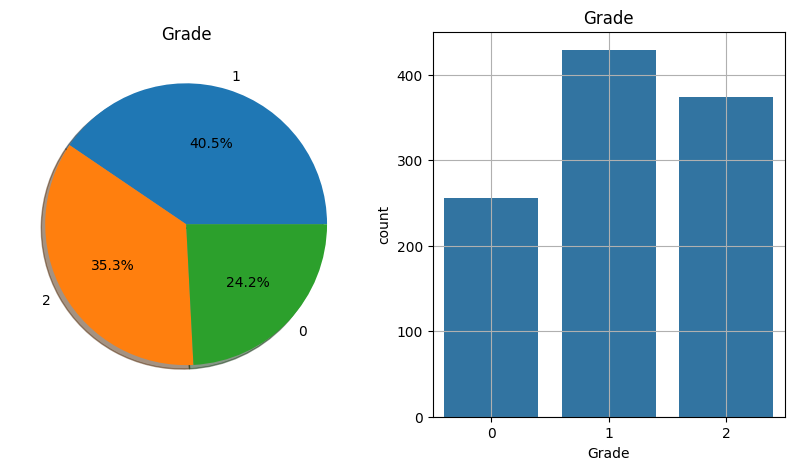

In [15]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

milkdata['Grade'].value_counts().plot.pie(
    autopct='%1.1f%%',  
    ax=ax[0],  
    shadow=True
)
ax[0].set_title('Grade')
ax[0].set_ylabel('')
sns.countplot(x='Grade', data=milkdata, ax=ax[1])
ax[1].set_title('Grade')

plt.grid()
plt.show()

## Histograms

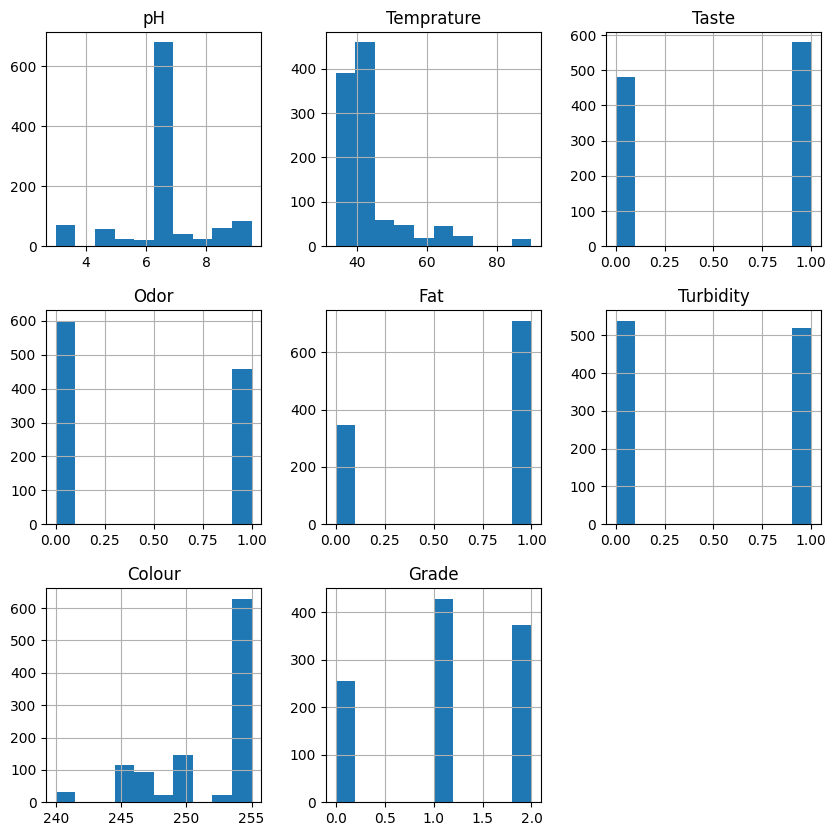

In [16]:
milkdata.hist(bins=10, figsize=(10, 10))
plt.show()

## Checking the Grade values.

In [17]:
milkdata.Grade.value_counts()

Grade
1    429
2    374
0    256
Name: count, dtype: int64

## Scatter matrix

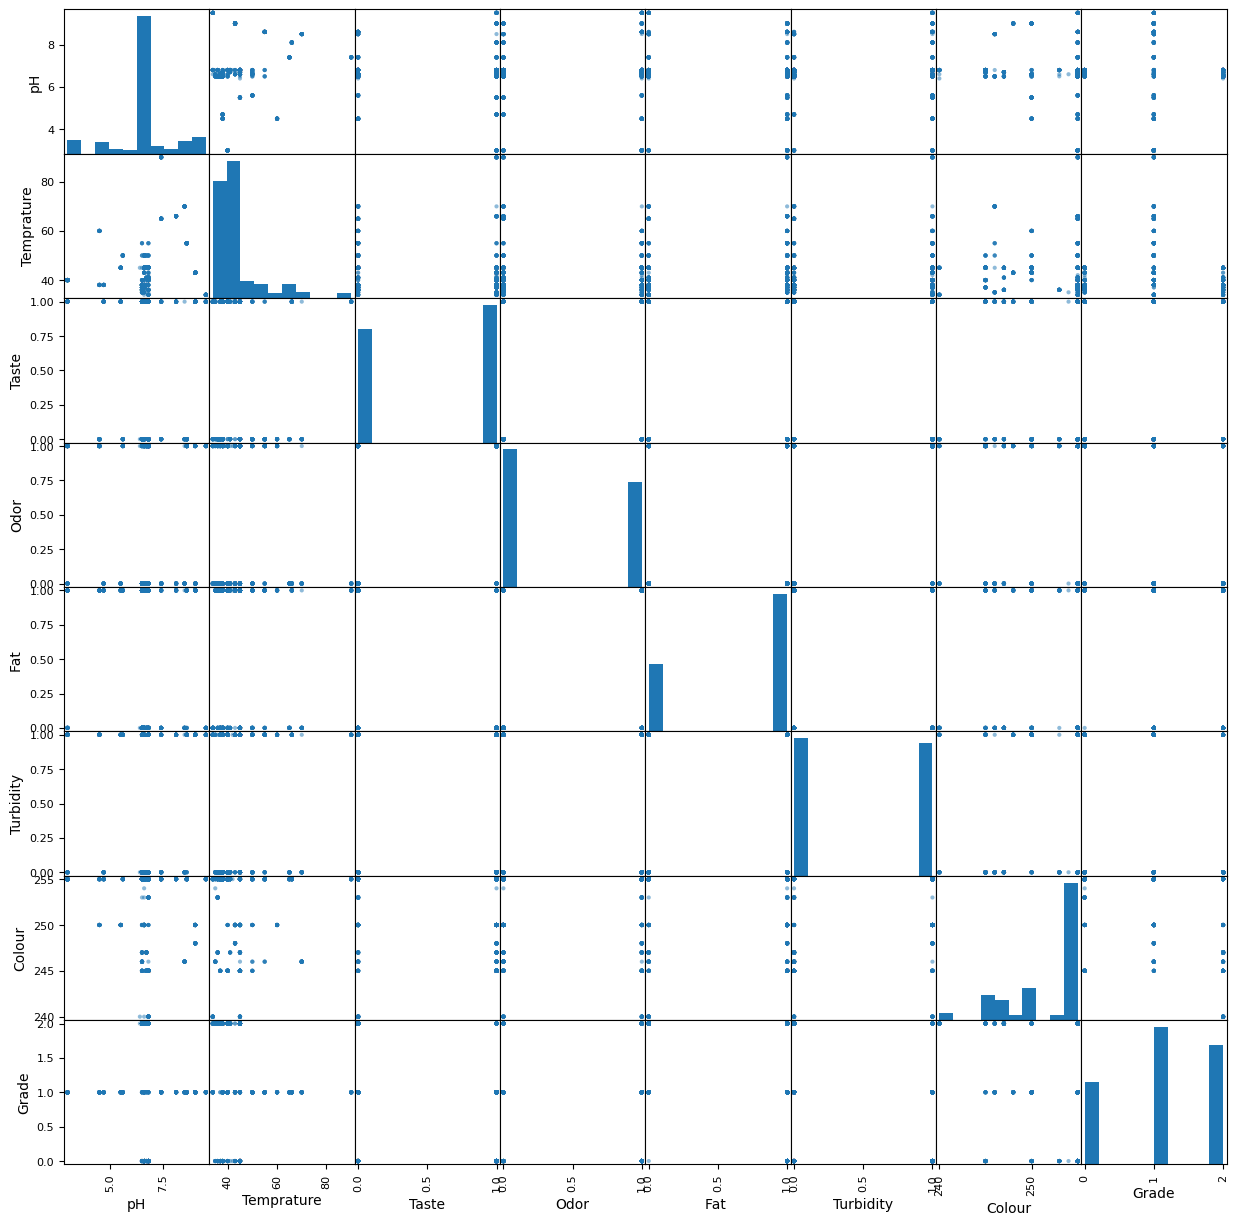

In [18]:
from pandas.plotting import scatter_matrix

scatter_matrix(milkdata, figsize=(15, 15));

## Pair plot

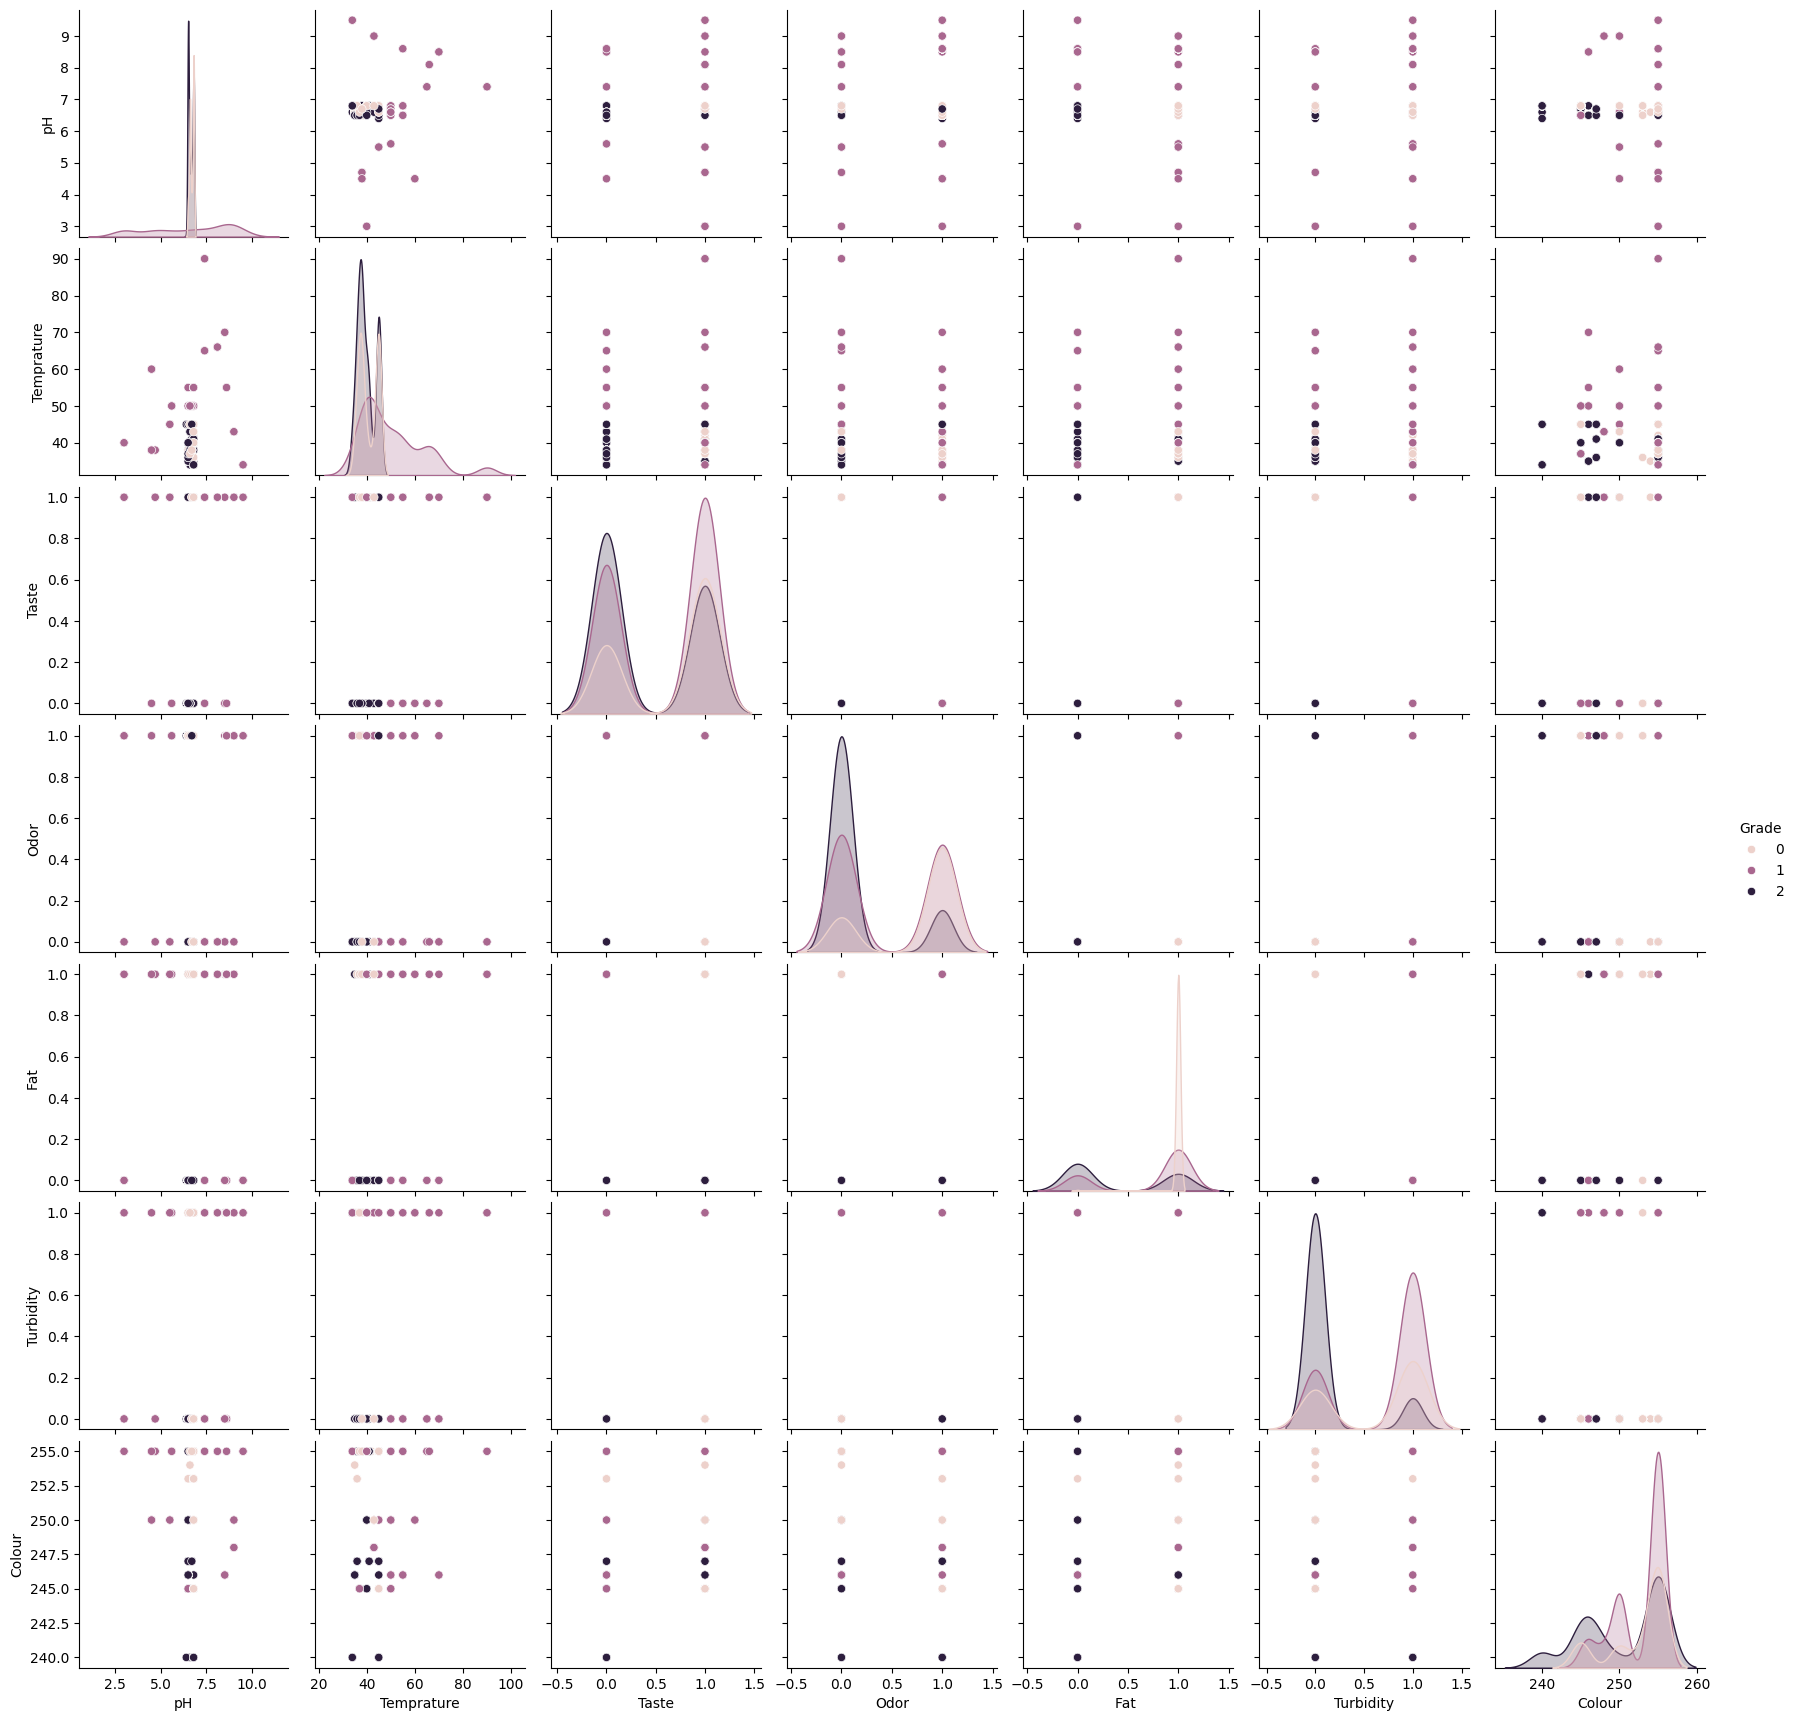

In [19]:
sns.pairplot(data=milkdata, hue='Grade')

plt.show()

## Indentify the Correlation

In [20]:
milkdata.corr() 

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,-0.012518
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.094232
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,-0.197629
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,-0.454609
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,-0.501070
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.428017
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.212994
Grade,-0.012518,-0.094232,-0.197629,-0.454609,-0.501070,-0.428017,-0.212994,1.000000


## Correlation Heatmap

<Axes: >

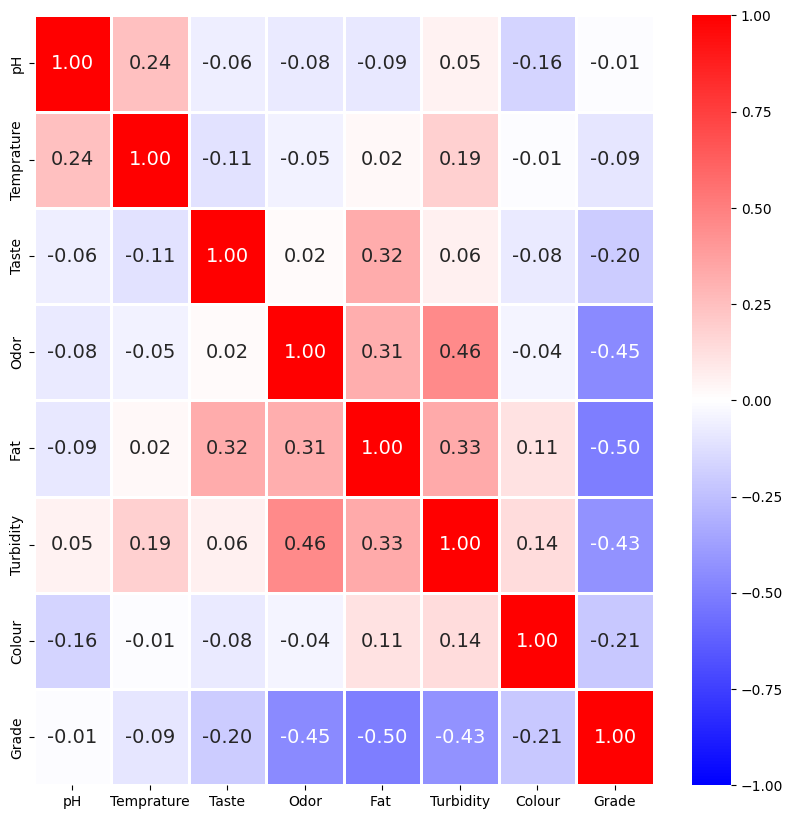

In [21]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(milkdata.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")

## Spliting Features and Targets

In [22]:
X=milkdata.drop(['Grade'],axis=1)

y=milkdata['Grade']

## Feature Scaling

In [23]:
# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the feature set 'X'
scaler.fit(X)

StandardScaler()

## Train test split

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Checking the X_train

In [25]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
5,6.6,37,1,1,1,1,255
310,6.6,37,1,1,1,1,255
557,4.7,38,1,0,1,0,255
104,5.6,50,0,1,1,1,255
97,6.5,37,0,0,0,0,255
...,...,...,...,...,...,...,...
330,9.0,43,1,0,1,1,250
466,6.7,45,1,1,1,0,245
121,6.5,36,0,0,1,0,255
1044,6.6,50,0,0,0,1,250


## Initializing LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

## Score and Metrics for Logistic Regression

In [27]:
print("The Training score of Logistic regression is: ",lr.score(X_train,y_train))

f1 = f1_score(y_test, lr_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, lr_pred))

The Training score of Logistic regression is:  0.7206477732793523
F1 Score: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.37      0.44        76
           1       0.69      0.73      0.71       115
           2       0.75      0.87      0.81       127

    accuracy                           0.70       318
   macro avg       0.67      0.65      0.65       318
weighted avg       0.68      0.70      0.68       318



## Testing score for Logistic regression

In [28]:
print("The Testing score of Logistic regression is: ",lr.score(X_test,y_test))

The Testing score of Logistic regression is:  0.6981132075471698


## Initializing Support Vector Classifier

In [29]:
svc = SVC(kernel='linear', random_state=0)  

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

## Score and Metrics for Support Vector Classifier

In [30]:
print("The Training score of SVC is: ",svc.score(X_train, y_train))

f1 = f1_score(y_test, svc_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, svc_pred))

The Training score of SVC is:  0.9014844804318488
F1 Score: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        76
           1       0.90      0.85      0.88       115
           2       0.96      0.87      0.91       127

    accuracy                           0.87       318
   macro avg       0.87      0.88      0.87       318
weighted avg       0.89      0.87      0.88       318



## Testing score for Support Vector Classifier

In [31]:
print("The Test score of SVC is: ",svc.score(X_test, y_test))

The Test score of SVC is:  0.8742138364779874


## Initializing RandomForestClassifier

In [32]:
rf=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

## Score and Metrics for RandomForestClassifier

In [33]:
print("The Training score of RandomForestClassifier is: ",rf.score(X_train, y_train))

f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, rf_pred))

The Training score of RandomForestClassifier is:  0.9122807017543859
F1 Score: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75        76
           1       0.98      0.92      0.95       115
           2       0.78      1.00      0.88       127

    accuracy                           0.88       318
   macro avg       0.91      0.84      0.86       318
weighted avg       0.90      0.88      0.87       318



## Testing score for RandomForestClassifier

In [34]:
print("The Testing score of RandomForestClassifier is: ",rf.score(X_test, y_test))

The Testing score of RandomForestClassifier is:  0.8773584905660378


## Initialize GradientBoostingClassifier

In [35]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

In [36]:
print("The Training score of GradientBoostingClassifier is: ",gb.score(X_train, y_train))

f1 = f1_score(y_test, gb_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, gb_pred))

The Training score of GradientBoostingClassifier is:  1.0
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       1.00      0.99      1.00       115
           2       0.99      1.00      1.00       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [37]:
## Seems to be the model is over fitting (100%) Accuracy, so we dont consider this model.

## Confusion matrix for Logistic regression

In [38]:
lr_cm = confusion_matrix(y_test,lr_pred)
print(lr_cm)

[[ 28  26  22]
 [ 17  84  14]
 [  5  12 110]]


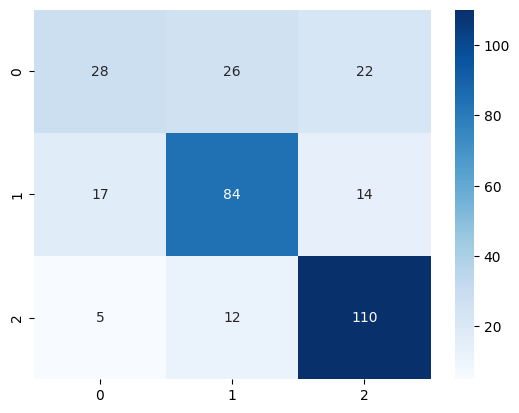

In [46]:
sns.heatmap(confusion_matrix(y_test, lr_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [39]:
print("accuracy for lr: ",accuracy_score(y_test,lr_pred))

accuracy for lr:  0.6981132075471698


## Confusion matrix for Support vector classifier

In [40]:
svc_cm = confusion_matrix(y_test,svc_pred)
print(svc_cm)

[[ 70   3   3]
 [ 16  98   1]
 [  9   8 110]]


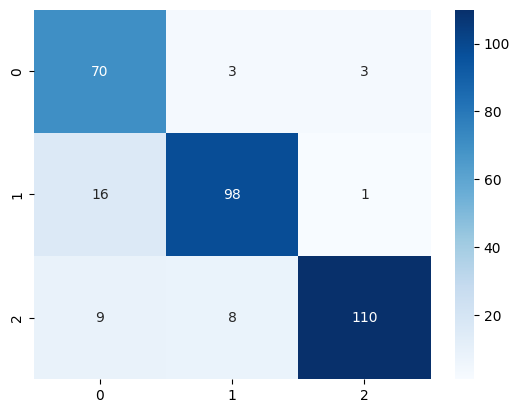

In [47]:
sns.heatmap(confusion_matrix(y_test, svc_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [41]:
print("accuracy for svc: ", accuracy_score(y_test,svc_pred))

accuracy for svc:  0.8742138364779874


## Confusion matrix for Random Forest Classifier

In [42]:
rf_cm = confusion_matrix(y_test,rf_pred)
print(rf_cm)

[[ 46   2  28]
 [  1 106   8]
 [  0   0 127]]


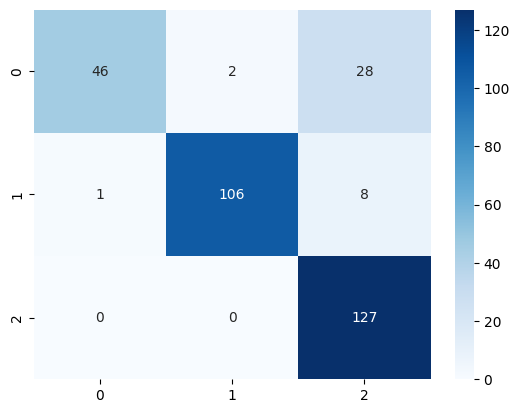

In [48]:
sns.heatmap(confusion_matrix(y_test, rf_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

## Confusion matrix for GradientBoostingClassifier

In [43]:
gb_cm = confusion_matrix(y_test,gb_pred)
print(gb_cm)

[[ 75   0   1]
 [  1 114   0]
 [  0   0 127]]


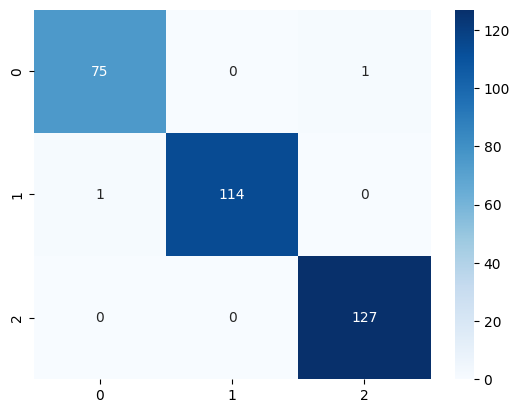

In [49]:
sns.heatmap(confusion_matrix(y_test, gb_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [44]:
# As of now from the used 4 alogrithm random forest classfier have good accuracy, 
# hence we use 'rf' to save the model to proceed to the prediction.

## Save the model

In [45]:
filename = 'milk_model.sav'
pickle.dump(rf, open(filename, 'wb')) # random forest classifier model